# Neural Networks on Fashion MNIST Dataset

## Objective
In this week's exercise, you will:
1. Utilize callback functions to monitor model's performance during training.
2. Experiment with different layer sizes to observe their effects on prediction accuracy and training speed.
3. Implement pixel value normalization to improve network training speed.
4. Construct a multilayer neural network to classify the Fashion MNIST image dataset.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


---

## Step 2: Load and Preprocess the Data
We'll load the Fashion MNIST dataset and then normalize the pixel values.


In [2]:
# TODO Load the dataset using the fashion_mnist.load_data() function
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# TODO Normalize the pixel values to be in range 0..1
train_images, test_images = train_images / 255.0, test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---

## Step 3: Visualize the Data
Display some samples from the dataset.


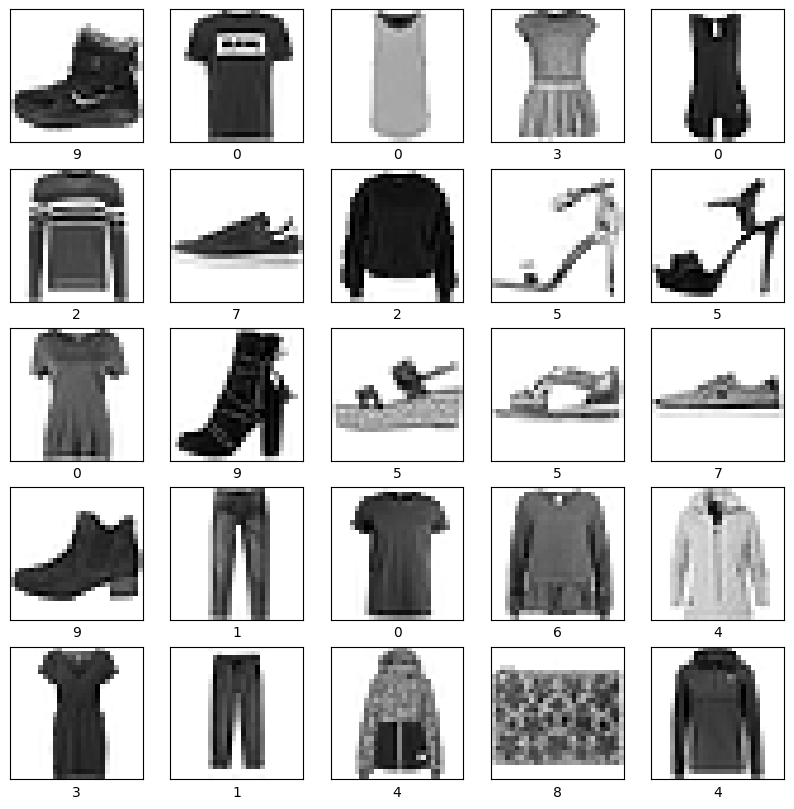

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

---

## Step 4: Define a Callback
Let's define a callback to monitor the model's accuracy during training.


In [4]:
# TODO define a callback that interrupts training after an accuracy of 90% is reached
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        '''
        Halts the training when the loss falls below 0.4

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from the training epoch
        '''

        # Check the loss
        if logs.get('accuracy') >= 0.90:

            # Stop if threshold is met
            print("\nAccuracy is greater than 0.9 so cancelling training!")
            self.model.stop_training = True

accuracy_callback = AccuracyCallback()


---

## Step 5: Build a Neural Network
We will start with a simple neural network and then experiment with different layer sizes.


In [5]:
# TODO build an initial model (hint: you might need to flatten the input in the beginning)
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# TODO compile your model, choose an optimizer, a loss function
# and a metric for measuring training performance

model.compile(
		optimizer='adam',
		loss='sparse_categorical_crossentropy',
		metrics=['accuracy']
	)

---

## Step 6: Train the Model
Train the model using the training data and your callback function.


In [6]:
model.fit(train_images, train_labels, epochs=10, callbacks=[accuracy_callback])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7940 - loss: 0.5795
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8666 - loss: 0.3646
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8800 - loss: 0.3251
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8902 - loss: 0.2963
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9003 - loss: 0.2756
Epoch 6/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9015 - loss: 0.2665
Accuracy is greater than 0.9 so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9015 - loss: 0.2665


---

## Step 7: Evaluate the Model
Evaluate the model using the test data.


In [7]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.3371
Test accuracy: 87.86%


---

## Step 8: Experiment with Layer Sizes
Modify the neural network architecture by changing the layer sizes, and note the effects on training speed and prediction accuracy. You are encouraged to experiment with various configurations.
